# PROJEK PREDIKSI STROKE DENGAN KLASIFIKASI KNN

- 2210511043 Rafie Rojagat Bachri
- 2210511057 Nicolas Debrito
- 2210511069 Salma Nabila Lovyanti
- 2210511081 Yusuf Martinus Arief
- 2210511086 Muhammad Rezka Al Maghribi

## LIBRARY

Melakukan import pada Library yang digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## DATA  PREPARATION

Membuat dataframe brain_stroke_df dengan membaca file brain_stroke.csv

In [2]:
brain_stroke_df = pd.read_csv('brain_stroke.csv')
brain_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


## DATA PREPROCESSING

Melakukan pengecekan dataframe dengan .info(), .isnull(), .describe(), dan .duplicated()

In [3]:
brain_stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
brain_stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
brain_stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
print("Total duplikat ", brain_stroke_df.duplicated().sum())

Total duplikat  0


Setelah dilakukan pengecekan tidak ditemukan missing value ataupun duplikasi data.

### DATA CLEANING

Karena dataframe brain_stroke_df sudah bersih tidak diperlukan proses cleaning data

## DATA TRANSFORMATION

###    Label Encoding

Sebelum menggunakan brain_stroke_df data pada dataframe harus bersifat numerikal, data yang masih kategorikal harus diubah menjadi numerikal sebelum dilakukan proses kalsifikasi dengan LabelEncoder

In [7]:
lEncoding = preprocessing.LabelEncoder()
transAtribut = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
for trans in transAtribut:
    brain_stroke_df[trans] = lEncoding.fit_transform(brain_stroke_df[trans])
brain_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


Melihat jumlah stroke bernilai true dan flase

In [8]:
brain_stroke_df["stroke"].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

### Split Data

Melakukan pembagian datarframe menjadi dataframe untuk latih dan dataframe untuk uji

In [9]:
x = brain_stroke_df.iloc[:,:10]
y = brain_stroke_df.iloc[:,10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=71)

Melihat dataframe yang akan dilatih yaitu x_train dan y_train, serta daframe yang akan diuji x_test dan y_test

In [10]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
222,0,42.0,0,0,1,1,0,82.67,22.5,2
3088,1,47.0,0,0,1,1,0,72.20,33.0,0
2773,1,44.0,0,0,1,1,0,60.32,25.0,2
3023,1,9.0,0,0,0,3,1,78.24,15.3,0
2453,0,42.0,0,0,1,1,0,69.99,46.0,3
...,...,...,...,...,...,...,...,...,...,...
2785,1,33.0,0,0,0,2,0,91.53,38.8,1
1320,1,2.0,0,0,0,3,1,80.98,19.9,0
1576,0,21.0,0,0,0,1,1,78.35,20.3,0
3083,0,9.0,0,0,0,3,1,82.64,14.5,0


In [11]:
y_train

222     0
3088    0
2773    0
3023    0
2453    0
       ..
2785    0
1320    0
1576    0
3083    0
4013    0
Name: stroke, Length: 3486, dtype: int64

In [12]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1484,0,81.0,0,1,1,1,1,84.93,31.8,0
872,0,3.0,0,0,0,3,1,65.15,15.1,0
2786,1,60.0,0,0,1,1,0,65.16,30.8,2
1715,0,12.0,0,0,0,3,0,85.97,35.7,0
4200,0,39.0,0,0,0,1,0,90.11,23.6,2
...,...,...,...,...,...,...,...,...,...,...
2999,0,51.0,0,0,1,0,0,105.52,30.8,2
1009,1,34.0,0,0,1,1,1,85.57,26.8,0
3912,1,43.0,0,0,1,1,0,207.37,29.5,1
3910,0,44.0,0,0,1,1,0,87.71,34.0,1


In [13]:
y_test

1484    0
872     0
2786    0
1715    0
4200    0
       ..
2999    0
1009    0
3912    0
3910    0
4562    0
Name: stroke, Length: 1495, dtype: int64

## DATA MINING: KLASIFIKASI dengan K-NN 

Melakukan pencarian nilai k untuk menentukan seberapa banyak jumlah tetangga terdekat yang akan diambil

In [14]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
k_params = grid_search.best_params_["n_neighbors"] if grid_search.best_params_["n_neighbors"] % 2 == 1 else grid_search.best_params_["n_neighbors"] - 1
print("Nilai K: ", k_params)

Nilai K:  13


Melakukan klasifikasi KNN dengan bantuan library sklearn untuk melatih x_train dan y_train dan mencari hasil prediksi y_pred dengan menguji x_test

In [15]:
neigh = KNeighborsClassifier(n_neighbors=k_params)

train = neigh.fit(x_train, y_train)

y_pred = train.predict(x_test)
y_pred = pd.DataFrame(y_pred)
print(y_pred.value_counts())

0    1493
1       2
Name: count, dtype: int64


## EVALUATION

Melakukan penghitungan confusion matrix dari nilai y_pred dan y_test

In [16]:
confusion_metrics = metrics.confusion_matrix(y_pred,y_test)
print(confusion_metrics)

[[1422   71]
 [   2    0]]


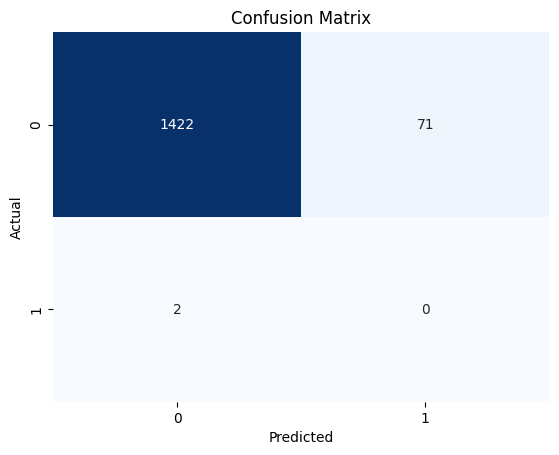

In [17]:
sns.heatmap(confusion_metrics, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Melakukan penghitungan evaluasi model berdasarkan classification report

In [18]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1424
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.95      0.93      1495

